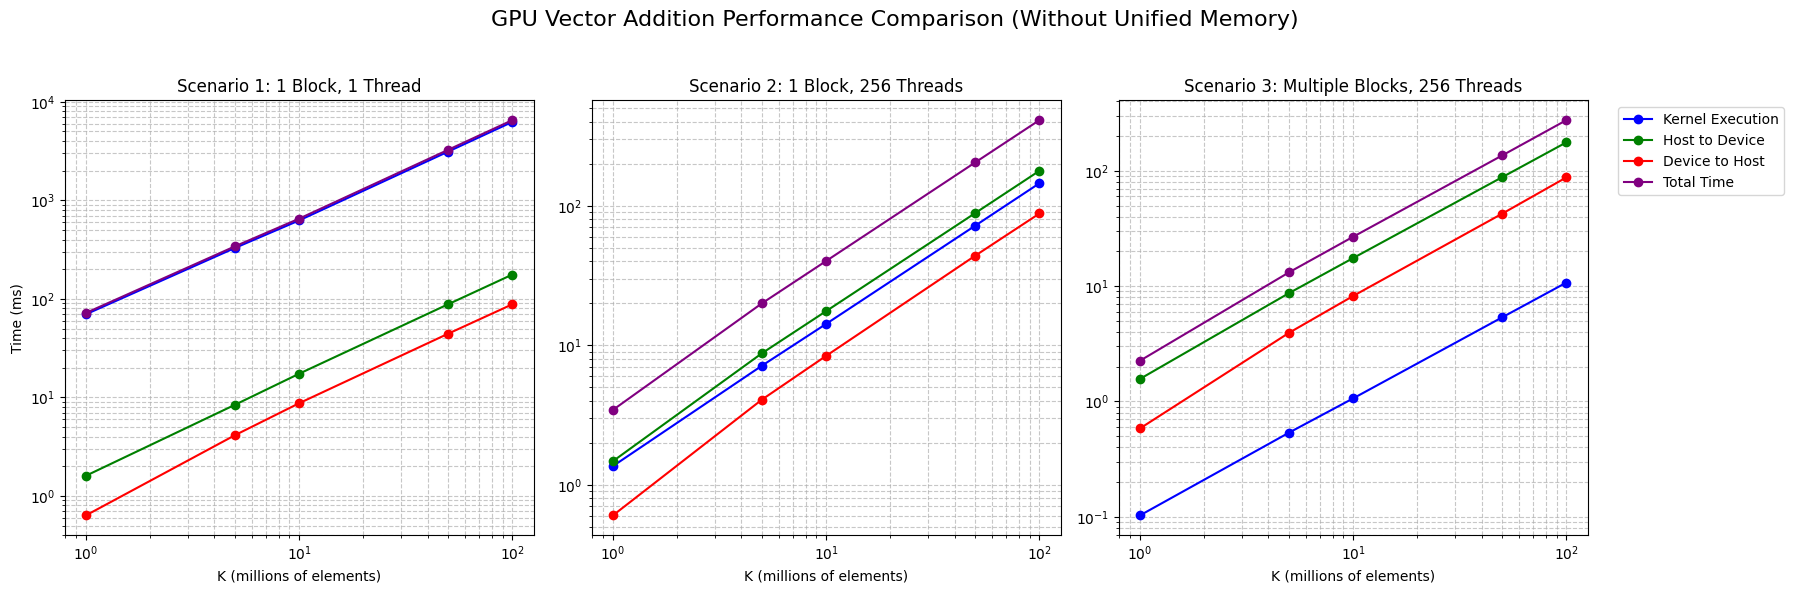

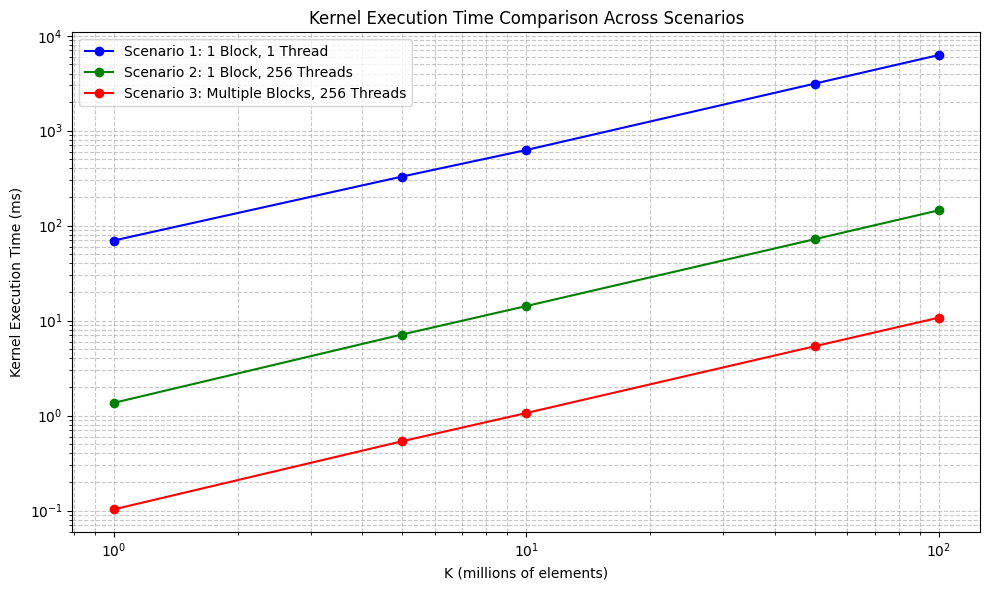

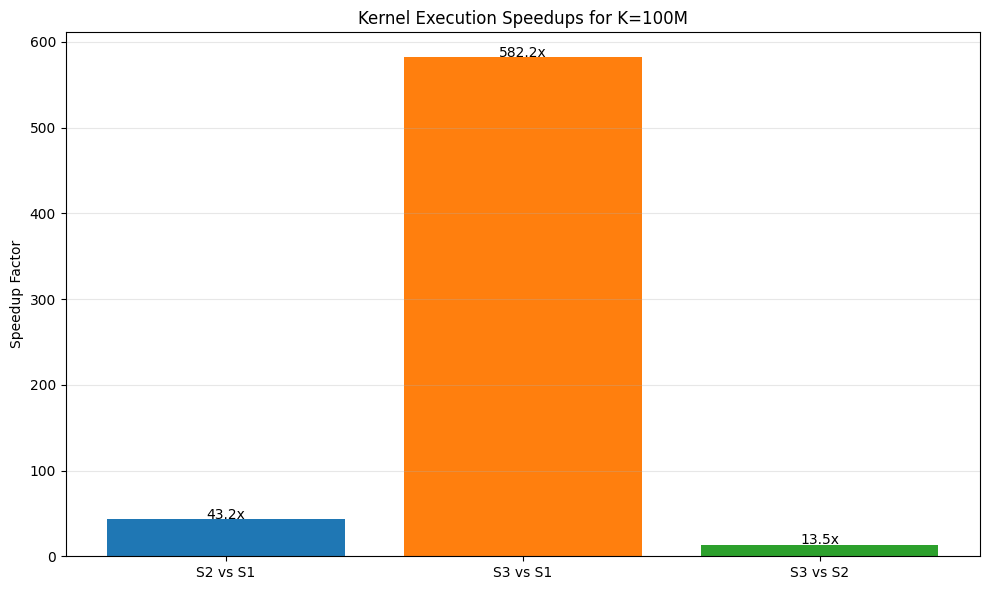

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# K values (in millions)
K_values = [1, 5, 10, 50, 100]

# Scenario 1: 1 block, 1 thread (kernel execution times in ms)
scenario1_kernel = [69.752, 328.76, 625.81, 3127.00, 6257.03]
scenario1_h2d = [1.6021, 8.4166, 17.390, 88.229, 176.60]
scenario1_d2h = [0.63456, 4.1342, 8.7281, 44.339, 88.141]
scenario1_total = [
    scenario1_kernel[i] + scenario1_h2d[i] + scenario1_d2h[i]
    for i in range(len(scenario1_kernel))
]

# Scenario 2: 1 block, 256 threads
scenario2_kernel = [1.3615, 7.1431, 14.235, 71.984, 144.97]
scenario2_h2d = [1.4764, 8.7709, 17.575, 88.629, 178.07]
scenario2_d2h = [0.60352, 4.0820, 8.4008, 43.860, 87.984]
scenario2_total = [
    scenario2_kernel[i] + scenario2_h2d[i] + scenario2_d2h[i]
    for i in range(len(scenario2_kernel))
]

# Scenario 3: Multiple blocks, 256 threads per block
scenario3_kernel = [0.10291, 0.53677, 1.0646, 5.3694, 10.748]
scenario3_h2d = [1.5690, 8.6992, 17.532, 88.107, 176.65]
scenario3_d2h = [0.58407, 3.9389, 8.2231, 42.541, 87.762]
scenario3_total = [
    scenario3_kernel[i] + scenario3_h2d[i] + scenario3_d2h[i]
    for i in range(len(scenario3_kernel))
]

# Create figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)

# Setup plot titles
fig.suptitle('GPU Vector Addition Performance Comparison (Without Unified Memory)', fontsize=16)
titles = [
    'Scenario 1: 1 Block, 1 Thread',
    'Scenario 2: 1 Block, 256 Threads',
    'Scenario 3: Multiple Blocks, 256 Threads'
]

# Data to plot
scenarios = [
    [scenario1_kernel, scenario1_h2d, scenario1_d2h, scenario1_total],
    [scenario2_kernel, scenario2_h2d, scenario2_d2h, scenario2_total],
    [scenario3_kernel, scenario3_h2d, scenario3_d2h, scenario3_total]
]

# Colors
colors = ['blue', 'green', 'red', 'purple']
labels = ['Kernel Execution', 'Host to Device', 'Device to Host', 'Total Time']

# Plot each scenario
for i, (ax, scenario_data) in enumerate(zip(axs, scenarios)):
    ax.set_title(titles[i])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('K (millions of elements)')
    if i == 0:  # Only add y-label to leftmost plot
        ax.set_ylabel('Time (ms)')
    ax.grid(True, which='both', linestyle='--', alpha=0.7)

    for j, (data, color, label) in enumerate(zip(scenario_data, colors, labels)):
        ax.plot(K_values, data, marker='o', color=color, label=label)

    # Only add legend to rightmost plot
    if i == 2:
        ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('gpu_vector_addition_performance.png', dpi=300)
plt.show()

# Create a second figure showing kernel time comparison across scenarios
plt.figure(figsize=(10, 6))
plt.loglog(K_values, scenario1_kernel, 'bo-', label='Scenario 1: 1 Block, 1 Thread')
plt.loglog(K_values, scenario2_kernel, 'go-', label='Scenario 2: 1 Block, 256 Threads')
plt.loglog(K_values, scenario3_kernel, 'ro-', label='Scenario 3: Multiple Blocks, 256 Threads')
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.xlabel('K (millions of elements)')
plt.ylabel('Kernel Execution Time (ms)')
plt.title('Kernel Execution Time Comparison Across Scenarios')
plt.legend()
plt.tight_layout()
plt.savefig('kernel_time_comparison.png', dpi=300)
plt.show()

# Create a third figure showing speedups
fig, ax = plt.subplots(figsize=(10, 6))
speedup_labels = ["S2 vs S1", "S3 vs S1", "S3 vs S2"]
speedup_values = [
    scenario1_kernel[4]/scenario2_kernel[4],
    scenario1_kernel[4]/scenario3_kernel[4],
    scenario2_kernel[4]/scenario3_kernel[4]
]

ax.bar(speedup_labels, speedup_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_ylabel('Speedup Factor')
ax.set_title('Kernel Execution Speedups for K=100M')
ax.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(speedup_values):
    ax.text(i, v + 0.5, f"{v:.1f}x", ha='center')

plt.tight_layout()
plt.savefig('kernel_speedups.png', dpi=300)
plt.show()

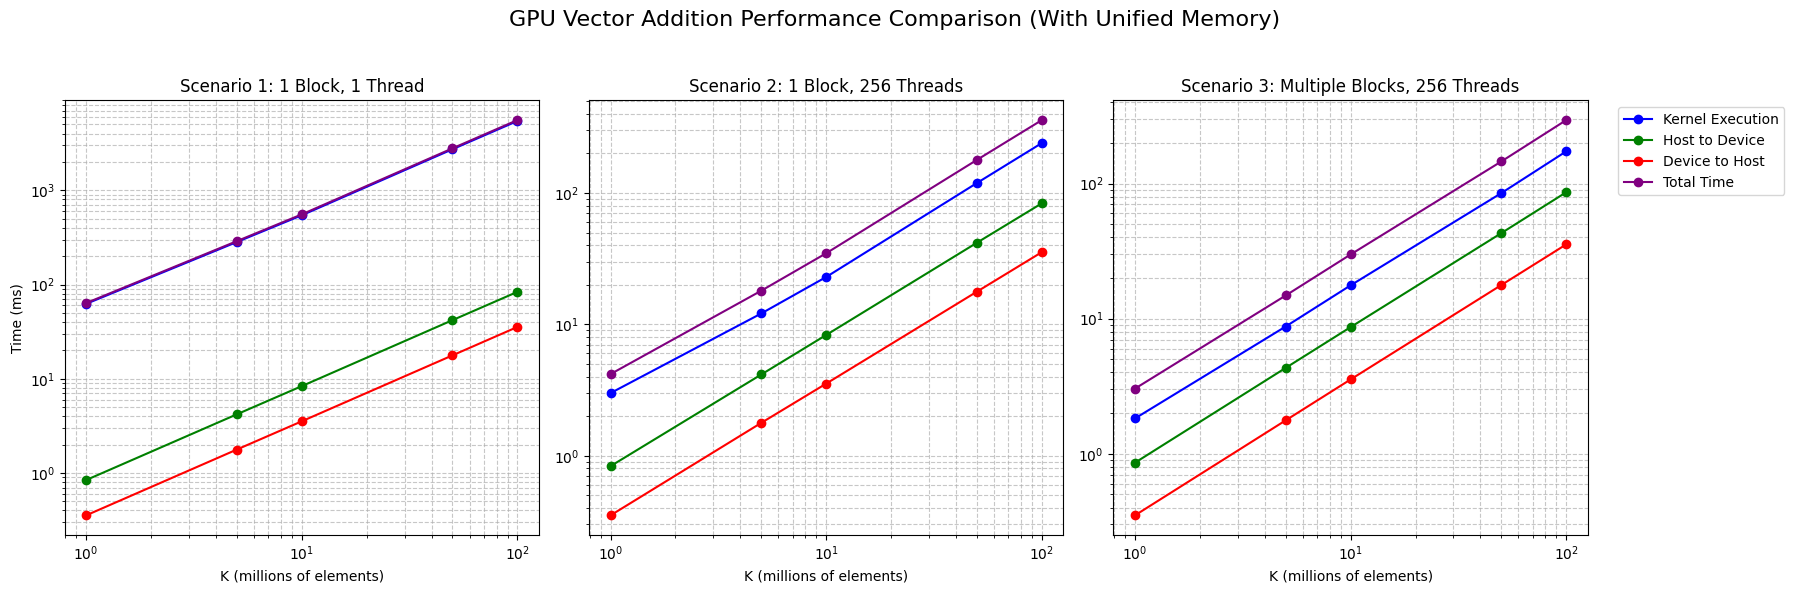

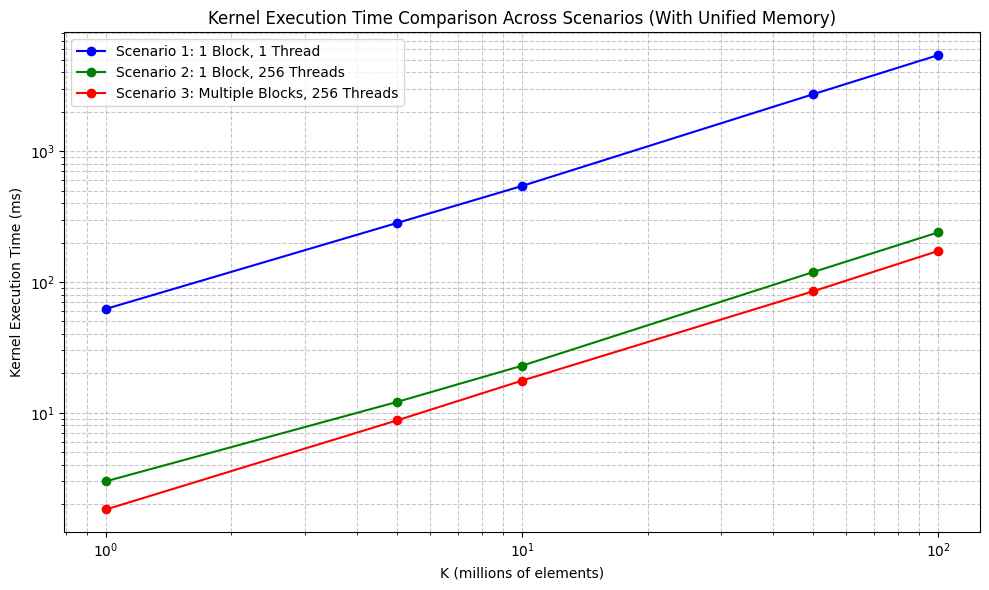

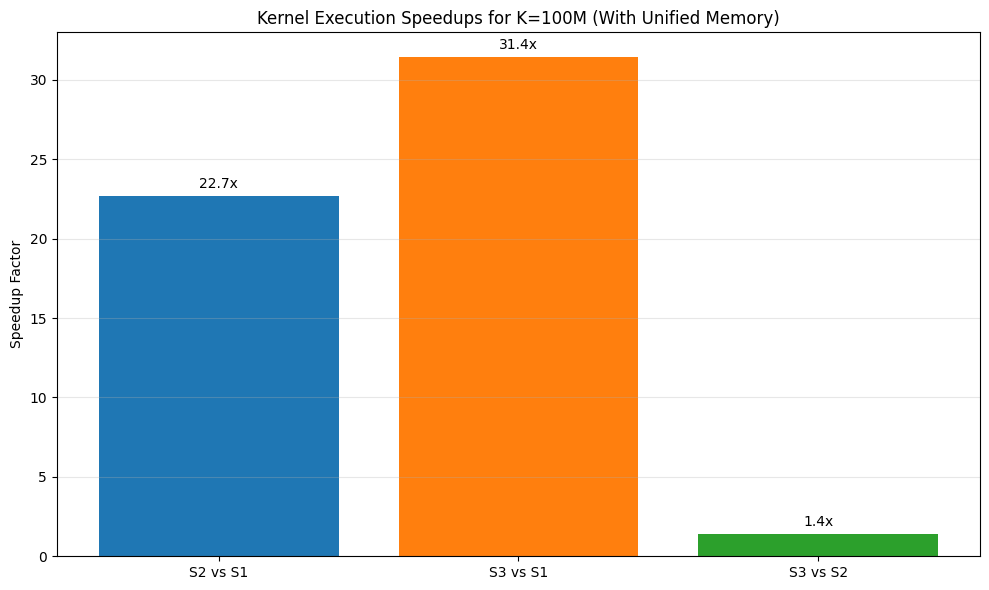

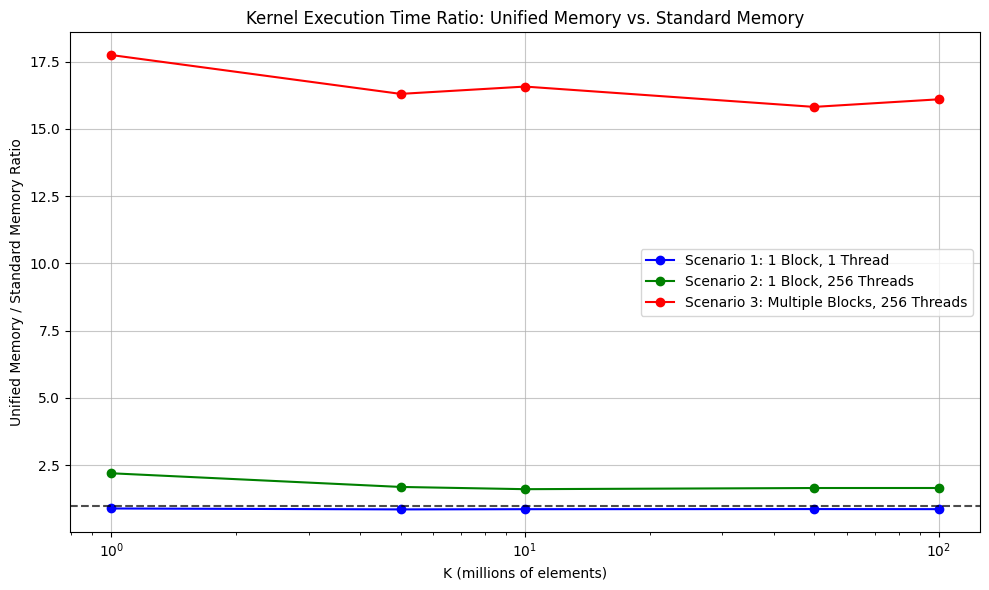

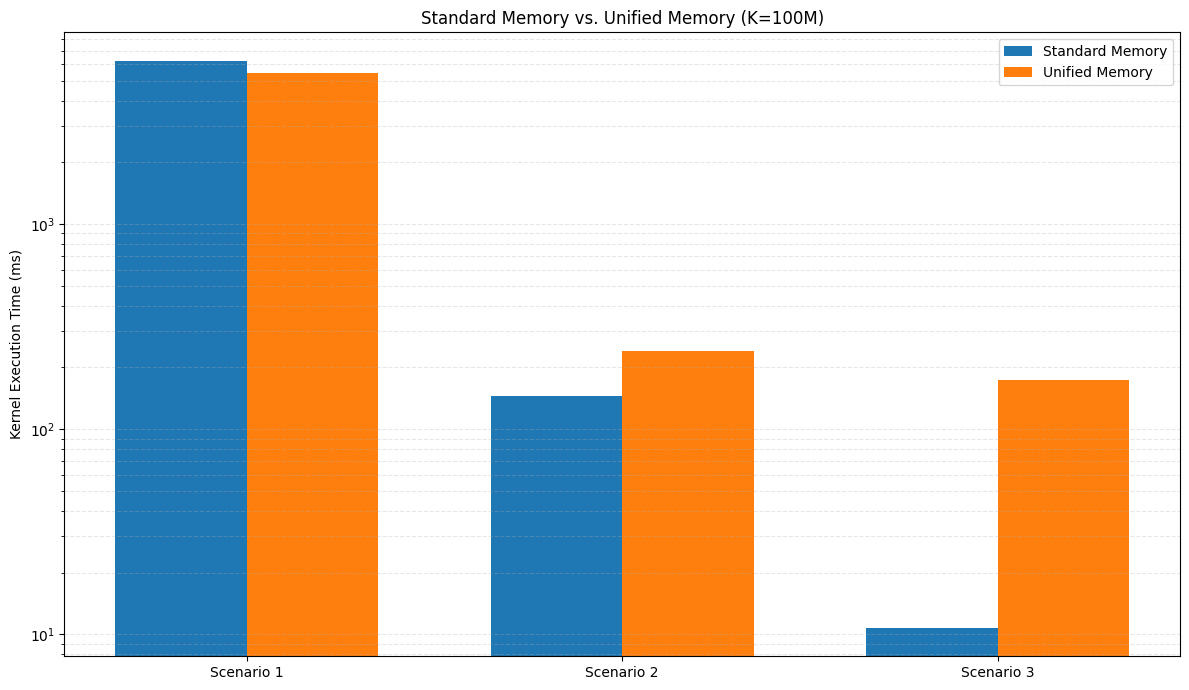

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# K values (in millions)
K_values = [1, 5, 10, 50, 100]

# Scenario 1: 1 block, 1 thread (times in ms from unified memory profiling)
scenario1_kernel = [62.337, 282.54, 542.88, 2726.16, 5435.11]
scenario1_htd = [0.8411, 4.1938, 8.3494, 41.8587, 83.5554]  # Host to Device times
scenario1_dth = [0.3550, 1.7730, 3.5351, 17.7067, 35.4450]  # Device to Host times
scenario1_total = [
    scenario1_kernel[i] + scenario1_htd[i] + scenario1_dth[i]
    for i in range(len(scenario1_kernel))
]

# Scenario 2: 1 block, 256 threads
scenario2_kernel = [2.9975, 12.102, 22.931, 119.06, 239.87]
scenario2_htd = [0.8331, 4.1522, 8.2978, 41.8144, 83.4378]
scenario2_dth = [0.3516, 1.7790, 3.5383, 17.7327, 35.4498]
scenario2_total = [
    scenario2_kernel[i] + scenario2_htd[i] + scenario2_dth[i]
    for i in range(len(scenario2_kernel))
]

# Scenario 3: Multiple blocks, 256 threads per block
scenario3_kernel = [1.8256, 8.7477, 17.639, 84.910, 172.99]
scenario3_htd = [0.8591, 4.3216, 8.6574, 42.9487, 86.1883]
scenario3_dth = [0.3503, 1.7680, 3.5492, 17.7308, 35.4411]
scenario3_total = [
    scenario3_kernel[i] + scenario3_htd[i] + scenario3_dth[i]
    for i in range(len(scenario3_kernel))
]

# Create figure with three subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)

# Setup plot titles
fig.suptitle('GPU Vector Addition Performance Comparison (With Unified Memory)', fontsize=16)
titles = [
    'Scenario 1: 1 Block, 1 Thread',
    'Scenario 2: 1 Block, 256 Threads',
    'Scenario 3: Multiple Blocks, 256 Threads'
]

# Data to plot
scenarios = [
    [scenario1_kernel, scenario1_htd, scenario1_dth, scenario1_total],
    [scenario2_kernel, scenario2_htd, scenario2_dth, scenario2_total],
    [scenario3_kernel, scenario3_htd, scenario3_dth, scenario3_total]
]

# Colors
colors = ['blue', 'green', 'red', 'purple']
labels = ['Kernel Execution', 'Host to Device', 'Device to Host', 'Total Time']

# Plot each scenario
for i, (ax, scenario_data) in enumerate(zip(axs, scenarios)):
    ax.set_title(titles[i])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('K (millions of elements)')
    if i == 0:  # Only add y-label to leftmost plot
        ax.set_ylabel('Time (ms)')
    ax.grid(True, which='both', linestyle='--', alpha=0.7)

    for j, (data, color, label) in enumerate(zip(scenario_data, colors, labels)):
        ax.plot(K_values, data, marker='o', color=color, label=label)

    # Only add legend to rightmost plot
    if i == 2:
        ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('gpu_unified_memory_performance.png', dpi=300)
plt.show()

# Create a comparison figure showing kernel times across all three scenarios
plt.figure(figsize=(10, 6))
plt.loglog(K_values, scenario1_kernel, 'bo-', label='Scenario 1: 1 Block, 1 Thread')
plt.loglog(K_values, scenario2_kernel, 'go-', label='Scenario 2: 1 Block, 256 Threads')
plt.loglog(K_values, scenario3_kernel, 'ro-', label='Scenario 3: Multiple Blocks, 256 Threads')
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.xlabel('K (millions of elements)')
plt.ylabel('Kernel Execution Time (ms)')
plt.title('Kernel Execution Time Comparison Across Scenarios (With Unified Memory)')
plt.legend()
plt.tight_layout()
plt.savefig('unified_memory_kernel_comparison.png', dpi=300)
plt.show()

# Create a bar chart for the speedups
fig, ax = plt.subplots(figsize=(10, 6))
speedup_labels = ["S2 vs S1", "S3 vs S1", "S3 vs S2"]
speedup_values = [
    scenario1_kernel[4]/scenario2_kernel[4],
    scenario1_kernel[4]/scenario3_kernel[4],
    scenario2_kernel[4]/scenario3_kernel[4]
]

ax.bar(speedup_labels, speedup_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_ylabel('Speedup Factor')
ax.set_title('Kernel Execution Speedups for K=100M (With Unified Memory)')
ax.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(speedup_values):
    ax.text(i, v + 0.5, f"{v:.1f}x", ha='center')

plt.tight_layout()
plt.savefig('unified_memory_speedups.png', dpi=300)
plt.show()

# Now create a comparison between with and without unified memory
# First, let's calculate the average overhead/improvement with unified memory
# Using the non-unified memory data from previous code
non_um_scenario1_kernel = [69.752, 328.76, 625.81, 3127.00, 6257.03]
non_um_scenario2_kernel = [1.3615, 7.1431, 14.235, 71.984, 144.97]
non_um_scenario3_kernel = [0.10291, 0.53677, 1.0646, 5.3694, 10.748]

# Calculate ratios (unified memory / non-unified memory)
ratio_s1 = [scenario1_kernel[i]/non_um_scenario1_kernel[i] for i in range(len(K_values))]
ratio_s2 = [scenario2_kernel[i]/non_um_scenario2_kernel[i] for i in range(len(K_values))]
ratio_s3 = [scenario3_kernel[i]/non_um_scenario3_kernel[i] for i in range(len(K_values))]

# Plot the ratios
plt.figure(figsize=(10, 6))
plt.semilogx(K_values, ratio_s1, 'bo-', label='Scenario 1: 1 Block, 1 Thread')
plt.semilogx(K_values, ratio_s2, 'go-', label='Scenario 2: 1 Block, 256 Threads')
plt.semilogx(K_values, ratio_s3, 'ro-', label='Scenario 3: Multiple Blocks, 256 Threads')
plt.axhline(y=1.0, color='black', linestyle='--', alpha=0.7)
plt.grid(True, alpha=0.7)
plt.xlabel('K (millions of elements)')
plt.ylabel('Unified Memory / Standard Memory Ratio')
plt.title('Kernel Execution Time Ratio: Unified Memory vs. Standard Memory')
plt.legend()
plt.tight_layout()
plt.savefig('unified_vs_standard_memory_ratio.png', dpi=300)
plt.show()

# Create a bar chart comparing the largest case (K=100M) across all scenarios
ind = np.arange(3)
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
standard_mem_bars = ax.bar(ind - width/2,
                           [non_um_scenario1_kernel[4], non_um_scenario2_kernel[4], non_um_scenario3_kernel[4]],
                           width, label='Standard Memory')
unified_mem_bars = ax.bar(ind + width/2,
                         [scenario1_kernel[4], scenario2_kernel[4], scenario3_kernel[4]],
                         width, label='Unified Memory')

ax.set_yscale('log')
ax.set_ylabel('Kernel Execution Time (ms)')
ax.set_title('Standard Memory vs. Unified Memory (K=100M)')
ax.set_xticks(ind)
ax.set_xticklabels(('Scenario 1', 'Scenario 2', 'Scenario 3'))
ax.legend()
ax.grid(True, which='both', linestyle='--', alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('standard_vs_unified_memory.png', dpi=300)
plt.show()